# DeepSleep 
## v1

- board
- r (run duration)
- ds (deep sleep duration)
- TX (test version)

## T1
Muestreado por 60 seg a 10ms de resolucion

In [1]:
board="nodemcu"
r = 10
ds = 30
TX = 1

batteries = [0.8, 2, 4, 10] #Ah

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

filename = f"../data/dslp--{board}_r{r}_ds{ds}-T{TX}.csv"

df = pd.read_csv(filename, parse_dates=["read_at", "timestamp"])

df.columns = ['index','read_at', 'millis', "dt", "v", "a", "w", "v_sh"]
df

,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-02-28 15:09:53.709425,73600,2025-02-28 15:09:53,5.096,0.0100,0.05096,0.00100
1,1,2025-02-28 15:09:53.720429,473612,2025-02-28 15:09:53,5.096,0.0100,0.05096,0.00100
2,2,2025-02-28 15:09:53.730039,473622,2025-02-28 15:09:53,5.096,0.0100,0.05096,0.00100
3,3,2025-02-28 15:09:53.741948,473633,2025-02-28 15:09:53,5.096,0.0100,0.05096,0.00100
4,4,2025-02-28 15:09:53.753320,473644,2025-02-28 15:09:53,5.096,0.0100,0.05096,0.00100
...,...,...,...,...,...,...,...,...
10500,10500,2025-02-28 15:11:53.660089,593547,2025-02-28 15:11:53,5.056,0.0808,0.40852,0.00808
10501,10501,2025-02-28 15:11:53.670305,593557,2025-02-28 15:11:53,5.056,0.0812,0.41055,0.00812
10502,10502,2025-02-28 15:11:53.682199,593569,2025-02-28 15:11:53,5.056,0.0808,0.40852,0.00808
10503,10503,2025-02-28 15:11:53.692348,593579,2025-02-28 15:11:53,5.056,0.0808,0.40852,0.00808


In [3]:
#remove the trailing data before reset
d = df#[df.millis.idxmin():]
d

,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-02-28 15:09:53.709425,73600,2025-02-28 15:09:53,5.096,0.0100,0.05096,0.00100
1,1,2025-02-28 15:09:53.720429,473612,2025-02-28 15:09:53,5.096,0.0100,0.05096,0.00100
2,2,2025-02-28 15:09:53.730039,473622,2025-02-28 15:09:53,5.096,0.0100,0.05096,0.00100
3,3,2025-02-28 15:09:53.741948,473633,2025-02-28 15:09:53,5.096,0.0100,0.05096,0.00100
4,4,2025-02-28 15:09:53.753320,473644,2025-02-28 15:09:53,5.096,0.0100,0.05096,0.00100
...,...,...,...,...,...,...,...,...
10500,10500,2025-02-28 15:11:53.660089,593547,2025-02-28 15:11:53,5.056,0.0808,0.40852,0.00808
10501,10501,2025-02-28 15:11:53.670305,593557,2025-02-28 15:11:53,5.056,0.0812,0.41055,0.00812
10502,10502,2025-02-28 15:11:53.682199,593569,2025-02-28 15:11:53,5.056,0.0808,0.40852,0.00808
10503,10503,2025-02-28 15:11:53.692348,593579,2025-02-28 15:11:53,5.056,0.0808,0.40852,0.00808


Text(0.5, 1.0, 'Current')

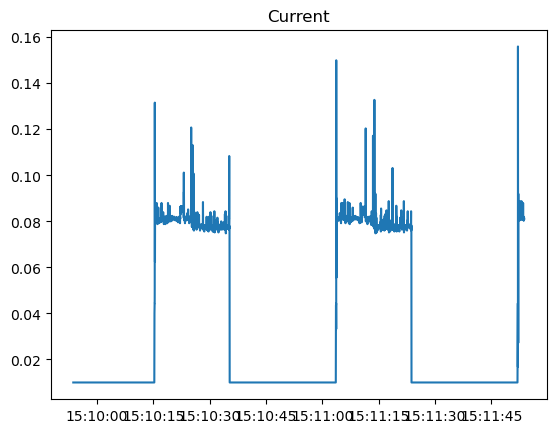

In [4]:
plt.plot(d.read_at, d.a)
plt.title("Current")

Text(0.5, 1.0, 'Voltage')

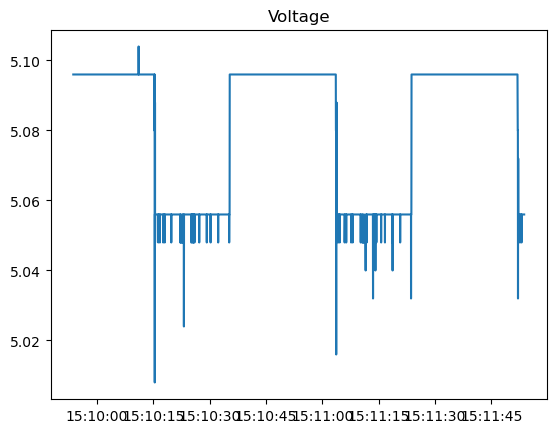

In [5]:
plt.plot(d.read_at, d.v)
plt.title("Voltage")

In [6]:
from scipy import integrate

time_data = (d.read_at - d.read_at.iloc[0]).dt.total_seconds()
current_data = d.a.to_numpy()
total_current = integrate.trapezoid(current_data, time_data)
total_current #A in timespan

np.float64(4.1277643002)

In [7]:
time_span = max(time_data)
time_span #seg

119.993828

In [8]:
avg_current = total_current / time_span
avg_current #A

np.float64(0.03439980513164394)

## Expected runtime using batteries

In [9]:
for bat_usable_cap in batteries: #Amp hour
    runtime = bat_usable_cap / avg_current
    print(f"At {bat_usable_cap:.02f}Ah:\t{runtime:.01f} hours,\t{runtime/24:.02f} days")

At 0.80Ah:	23.3 hours,	0.97 days
At 2.00Ah:	58.1 hours,	2.42 days
At 4.00Ah:	116.3 hours,	4.84 days
At 10.00Ah:	290.7 hours,	12.11 days
